# Анализ продаж компьютерных игр интернет-магазина «Стримчик»

В рамках предстоит вровести подготовку данных для анализа, пройдя процесс предобработки и изучения для проверки качества данных и последующей корректировки датасета. Целью работы выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Помимо подготовительной работы, потребуется определить портреты пользователелей во всех регионах, оценить гипотезы об оценках пользователей для избранных игровых платформ и жанров. Такаже, важной целью будет определении наиболее влиятельных игроков рынка и актуального периода рассмотрения данных, который позволит лечь в основу рекламных компаний. 

## Изучаем данные

In [42]:
import pandas as pd
import string
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from plotly import express as px

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
try:
    data = pd.read_csv("games.csv")
except:
    data = pd.read_csv('/datasets/games.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Типы данных, очевидно подлежат коррекции. Это касаестя Даты релиза(Year_of_Release) и пользовательских оценок игр (User_Score)

In [7]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Названия столбцов стоит привести к единому стилю - ниженему регистру. 

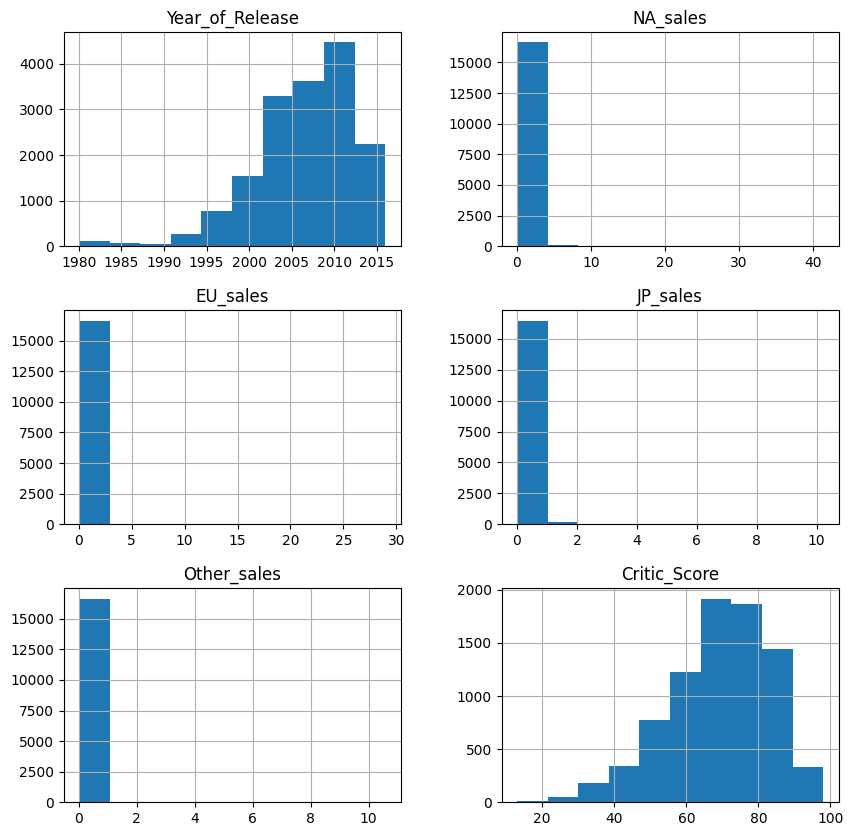

In [8]:
data.hist(figsize=(10, 10))
plt.show()

Critic_Score, Year_of_Release - скошены влево. медиана очевидно больше среднего

## Предобработка данных

### Подготовка данных

Переименуем столбцы для приведения к общему виду     

In [9]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками

In [10]:
print('Всего в выборке', data.isna().sum().sum(), 'пропусков, и вот в каких столбцах:')
data.isna().sum().to_frame().sort_values(by=0).style.background_gradient('coolwarm')

Всего в выборке 22318 пропусков, и вот в каких столбцах:


,0
platform,0
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
name,2
genre,2
year_of_release,269
user_score,6701
rating,6766


В процентном соотношении:

In [11]:
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

,0
platform,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
name,0.01%
genre,0.01%
year_of_release,1.61%
user_score,40.09%
rating,40.48%


Очистим строки, где все значения пустые, если такие имеются

In [12]:
data.dropna(how='all')
print('Теперь в выборке', data.isna().sum().sum(), 'пропусков')

Теперь в выборке 22318 пропусков


Ничего не изменилось, но проверить стоило. Теперь по отдельным столбцам:

#### Название игры и жанр (name, genre)

Пропусков в названии игры всего два - посмотрим на них подробнее:

In [13]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ни жанра, ни рэйтинга ни оценкок. Просто удалим строчки с пропусками в столбце name - название игры ключевая категориальная переменная, которую восстановить невозможно. 


In [14]:
data = data.dropna(subset=['name']).reset_index(drop=True)

Пропуски в столбце "genre" отпали тоже:


In [15]:
data['genre'].isna().sum()

0

Пропуски в двух этих столбцах могли появиться при выгрузке из-за технических ошибок или при заполнении данных пользователем. Они являются полностью случайными пропускуами категориальных переменных и не могут быть восстановлены.

#### Оценка пользователей (user_score)       

In [16]:
data['user_score'].unique()       

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Избавимся от значений "tbd" ("to be detected" - это значит, что и результат оценок еще не подведен). Заменим эти значения на NaN - самый удачный вариант, который никак не повлияет на качество датасета. 

In [17]:
data['user_score'] = data['user_score'].replace({'tbd':np.nan})

Пропуски здесь могли появиться из-за простого отсутствия оценок пользователей, или, по аналогии с tbd, на этапе ожидания подведения итога, но без соответствующей отметки.

#### Рейтинг от организации ESRB (rating)

In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Организация ESRB, организующая присвоение соответствующего рейтинга была основана только 1994 году. Поэтому отностилельно пропущенных значений можно сделать вывод об неслучайности. По распределению "год-количество присвоенных рейтингов" видно, что присвоение происходило постепенно для выпускаемых игр. Метод обработки пропусков здесь - при помощи "заглушек".

In [19]:
data.pivot_table(index='year_of_release', values='rating', aggfunc='count')

,rating
year_of_release,
1980.0,0
1981.0,0
1982.0,0
1983.0,0
1984.0,0
1985.0,1
1986.0,0
1987.0,0
1988.0,1


In [20]:
data['rating'] = data['rating'].fillna('NR')

In [21]:
data['rating'].isna().sum()

0

#### Оценка критиков (critic_score)

In [22]:
data['critic_score'].unique()       

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Оставим эти пропуски как есть чтобы не внести лишьних ошибок. Не все игры оценивают критики. Если ошибок в выгрузке нет, то наличие или отсутствие оценки критиков может говорить о степени интереса игрового сообщества к тем или иным играм, что укажет на значимость игр. 

#### Год релиза (year_of_release)

Для работы с пропусками понадобится предварительно определиться с форматом столбца. Нет никакого смысла использовать DateTime только для получения года. Если бы дата состояла еще и из значений числа и месяца, то изменение формата было бы оправдано возможностью получить их отдельные значения. 

In [23]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype('int')

In [24]:
data['year_of_release'].isna().sum()

0

Нулевые по дате стороки содержат данные, но они не могут быть привязаны к временному периоду, а в подготовке данных к построению прогнозов это ключевое условие, пожтому остается только исключить эти строики полностью. 

Пропуски здесь полностью случайные, дата релиза должна быть у каждой игры и не попала в выгрузку вероятно из-за ошибок.

#### Подведем итоги обработки пропусков: 

In [25]:
print('Теперь в выборке', data.isna().sum().sum(), 'пропусков')
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient('coolwarm')

Теперь в выборке 17442 пропусков


,0
name,0.00%
platform,0.00%
year_of_release,0.00%
genre,0.00%
na_sales,0.00%
eu_sales,0.00%
jp_sales,0.00%
other_sales,0.00%
rating,0.00%
critic_score,51.45%


Больше нет пустых значений в столбцах с названием, жанром и годом релиза. Количество пустых значений в столбце с оценками пользователей увеличилось на 3,27% за счет присвоения значению "tbd" привычных NaN-пропусков. Также, год релиза преобрел формат "int" более пригодный для анализа. Теперь в выборке 24463 пропусков, вместо 22318, что почти на 9% меньше. Сокращение небольшое, но в таком виде датасет уже пригоден для анализа, осталось только скорректировать форматы данных:

### Работа с форматами данных

In [26]:
data['user_score'].dtypes

dtype('O')

Из оставшихся столбцов, только "User_Score" требует работы с точки зрения формата данных. Видим, что 7590 не нулевых значений столбца имеют тип Object, что противоречит содержанию столбца - оценка пользователей значение числовое с дробной частью. Если этого не сделать, то с таким данными невозможно будет провести никаких математических операций и анализ будет невозможен. Исправим это:

In [27]:
data['user_score'] = pd.to_numeric(data['user_score'])
data['user_score'].dtypes

dtype('float64')

###  Проверка на дубликаты

#### Явные дубликаты   

Для качественной проверки на полные дубликаты, переведем значения в столбцах с категориальными переменными типа Object к единому стилю - нижнему регистру:

In [28]:
for column in ['name', 'platform', 'genre', 'rating']:
    data[column] = data[column].str.lower()

In [29]:
data.duplicated().sum()

0

Полных дубликатов не обнаружено, однако, в датафрейме есть несколько котегориальных значений, которые могут дублироваться (название, платформа, год релиза, жанр и рэйтинг), а в полной выборке, эти дубликаты могут быть скрыты из-за разночтениях в количественных значтениях. Такой факт может говорить о двойном учете количественных значений для категориальных переменных. Проверим это, собрав отдельных датафрейм только из категориальных значений:

#### Ручной поиск дубликатов      

In [30]:
dup_test = pd.DataFrame(data=data, columns=['name', 'platform', 'year_of_release', 'genre', 'rating'])                  
dup_test.head()

,name,platform,year_of_release,genre,rating
0,wii sports,wii,2006,sports,e
1,super mario bros.,nes,1985,platform,nr
2,mario kart wii,wii,2008,racing,e
3,wii sports resort,wii,2009,sports,e
4,pokemon red/pokemon blue,gb,1996,role-playing,nr


In [31]:
dup_test.duplicated().sum()

1

Действительно, есть такой дубликат. Посмотрим на значения в общем датафрейме:

In [32]:
data.loc[dup_test[dup_test.duplicated(keep=False)].index, ]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,e
15969,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,e


Очевидно, данные могли получиться из двух источников информации. Видим, что количественные переменные этих записей разнятся только в значении продаж на территории Европы. Вероятно, мог иметь мето отдельный канал прлодаж этой игры в Европе, который и образовал дубль. Сложим соответствующие значения eu_sales и оставим только одну запись:

In [33]:
data.loc[dup_test[dup_test.duplicated(keep='last')].index, 'eu_sales'] = \
data.loc[dup_test[dup_test.duplicated(keep=False)].index]['eu_sales'].sum()

In [34]:
data = data.drop(axis=0, index=dup_test[dup_test.duplicated(keep='first')].index).reset_index(drop=True)

Проверим:

In [35]:
dup_test = pd.DataFrame(data=data, columns=['name', 'platform', 'year_of_release', 'genre', 'rating']) 
dup_test.duplicated().sum()

0

Дубликатов больше нет! Посмотрим что у нас осталось

In [70]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

## Исследовательский анализ данных

Перед тем как приступить к непосредственному анализу, добавим общую метрику для продаж по всем локациям:

In [39]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

###  Выход игр по годам

Посмотрим как распределяется количество выпущеных игр по годам:

In [44]:
px.bar(data.pivot_table(index='year_of_release', values='name', aggfunc='count'), y='name', title='Число вышедших игр по годам')


С 1993 года по 2009 постоянный рост с явным скачком в 2002 году. а затем скачкообразный спад до 600 игр за год и с 2012 года это значение остается в пределах 550+-10 игр в год, похоже рынок к этому моменту перешел с количества на качество - любителю игр стало интереснее не вертикальное и горизонтальне разнообразие(внутри игры) - игры стали богаче, объемнее, сложнее и более проработанными. Помимо того, индустрия игр вышла на совершенно другой уровень производства - производители превратились в корпорации из небольших групп разработчиков-энтузиастов. 
<br/> <br/> 
Конечно, за все периоды данные не имеют смысла для прогноза на 2017 год - достаточно факта выравнивания количества игр год к году за последние 5 лет. Можно предположить что и в 2017 году будет выпущено не более 600 и не менее 500 игр. 

###  ТОП платформ

Чтобы отобразить распределение общих продаж по годам в разрезе платформ, удобно использовать тепловую карту:

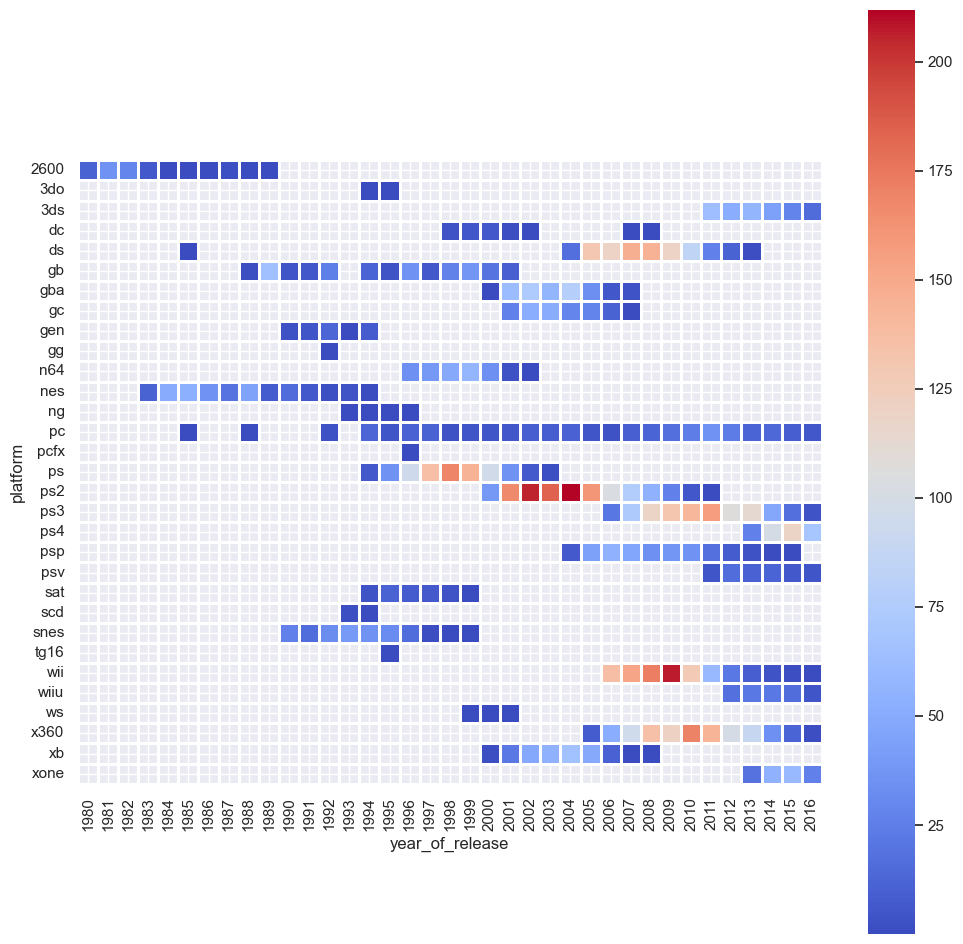

In [45]:
sns.set(rc = {'figure.figsize':(12,12)})
sns.heatmap(
    data.pivot_table(
        index='platform',
        columns='year_of_release',
        values='total_sales', aggfunc='sum'
    ),
    cmap="coolwarm",
    square=True,
    linewidth=2.0
) 
plt.show()

Вот что можно наблюдать в таком отображении датасета:
- Есть явный приод "жизни" платформы. Большенство платформ показывают продажи в периоде равном в среднем 10ть лет, например, платформа "Super Nintendo Entertainment System"("snes"), вышедша на рынок в 1990ом году, в 2000ом уже продаж не показала, так и с ее предшественницей Nintendo Entertainment System ("nes") и c Play Station 2 ("ps2"), "Play Station Personal"("PSP") и с прородителем индустрии "2600". Есть и не совсем типичные поведения и даже возрождения, как, например, с платформой DC в 2007 году. Однако, период в 10 лет является типичным, поэтому актуальный период, за который стоит рассматривать исторические данные 10лет.
- Выделяется на общем фоне платформа "PC". Ее период жизни не похож на типичний и уж точно не заканчивается. Это и понятно - игры на персональном компьютере при технологическом обогощении требуют соответствующегороста мощностей компонент аппаратной  платформы, а в случае с остальными игроками рынка, которые являются консолями, требуется полная замена платформы. Этот факт еще и разделяет рынок на две части - "персональные компьютеры" и консоли. И в кажой из этих частей свои правила позиционирования и развития продуктов. 
- В данных о "Nintendo DS", явно есть артефакт в 1985 году - тогда платформы еще не существовало, а продажи есть. Вероятнее всего это часть данных продаж PC-платформы, которую по-ошибке отделили из-за схожести в названии сокращений платформ. Руководствуясь выводом об актуальном периоде, корректировать это не будем, т.к. данные все равно не попадут в дальнейший анализ.
- Основную роль в формировании рынка игровых платформ сыграли представители линейки "Play Station", "Nintendo Wii" и "XBOX" - они показывают тепловые пики продаж, причем можно сделать выводы о поведении рынка и позиционировании платформ, если учесть когда именно на "жизненном пути" платформы Эти пики случались: "PS" - пик на пятом году "жизни" - платформа новая, рынок "холодный"; "PS2" - целых два пика в 2002 и 2004, причем уже со второго года существования - предидущая платформа хорошо разогрела рынок для выхода новой версии; "Nintendo Wii" c самого первого года выхода на рынок (2006 год) показывает высокие результаты, и стабильно их повышей вплоть до пика в 2009 году. 


Возьмем топ платформ c объемом продаж более 20 млн копий за актуальный период (последние три года). Период "жизи платформы" не более 10ти лет, при этом для анализа нам потребуются только актуальные платформы

In [46]:
current_period = data.query('year_of_release >= 2014')

top_platforms_sales = (
    current_period.pivot_table(
        index=['platform'], values='total_sales', aggfunc='sum'
    )
    .sort_values(
        by=['total_sales'], ascending=False
    )
    .query('total_sales > 45')
)
top_platforms_sales

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22


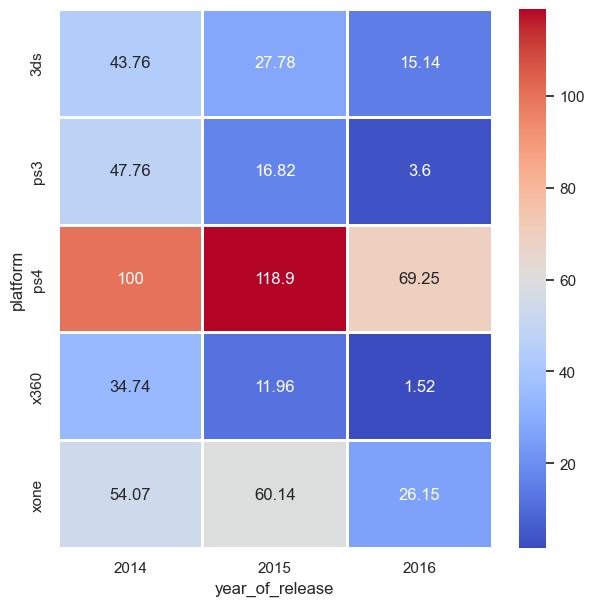

In [47]:
sns.set(rc = {'figure.figsize':(7,7)})
sns.heatmap(
    current_period.query('platform in @top_platforms_sales.index')
    .pivot_table(
        index='platform',
        columns='year_of_release',
        values='total_sales', aggfunc='sum',       
    ),
    cmap="coolwarm",
    linewidth=2.0,
    annot=True,
    fmt="1g"
) 
plt.show()

Все платформы показывают стабильный спад в 2016 году.  </b></b>

Добигающие "ps3" "x360" вероятно, продаж уже не покажут, т.к., помимо активного спада, они уже приблизились к 10-летнему порогу существования.  </b></b>

Итоговую картину 2017 года могут построить "новички в забеге" - ими могут считаться "xone", "ps4" "3ds". 


Для использования в отдельных пунктах будем спользовать ТОП-5 платформ - сохраним его в отдельной переменной: 

In [48]:
top_platforms = current_period.query('platform in @top_platforms_sales.index')

Построим "ящики с усами" для выявленного списка платформ.

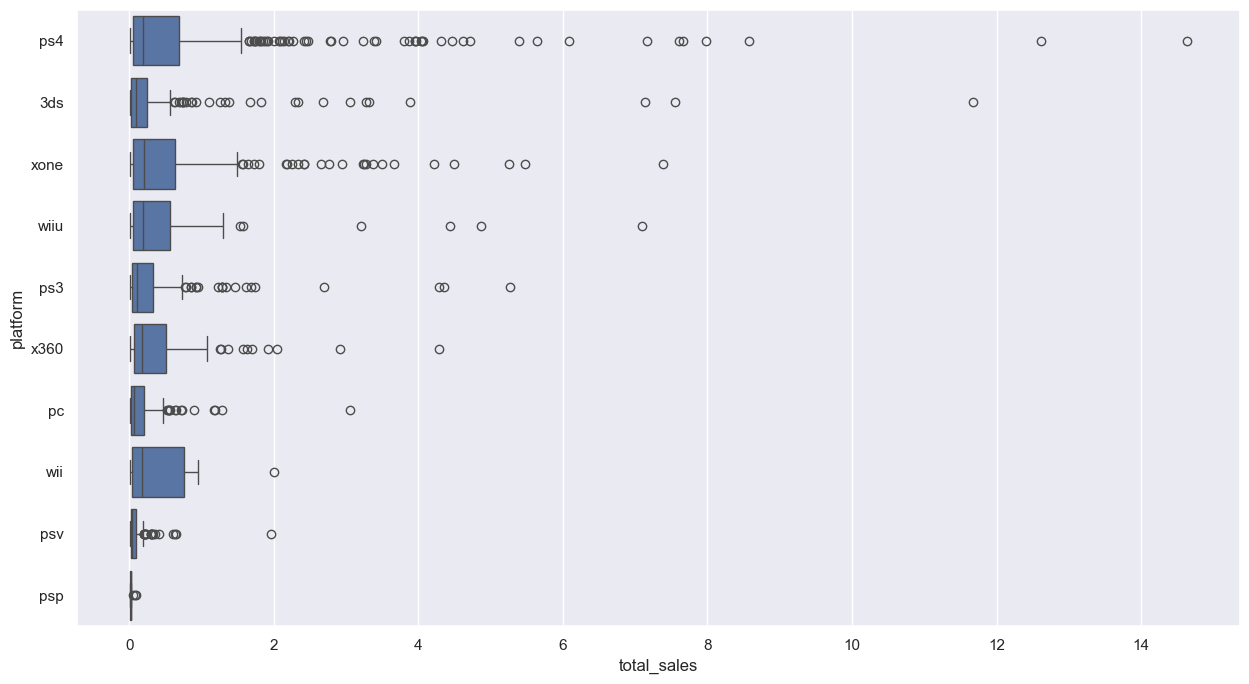

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.boxplot(x=current_period['total_sales'], y=current_period['platform'])
plt.show()

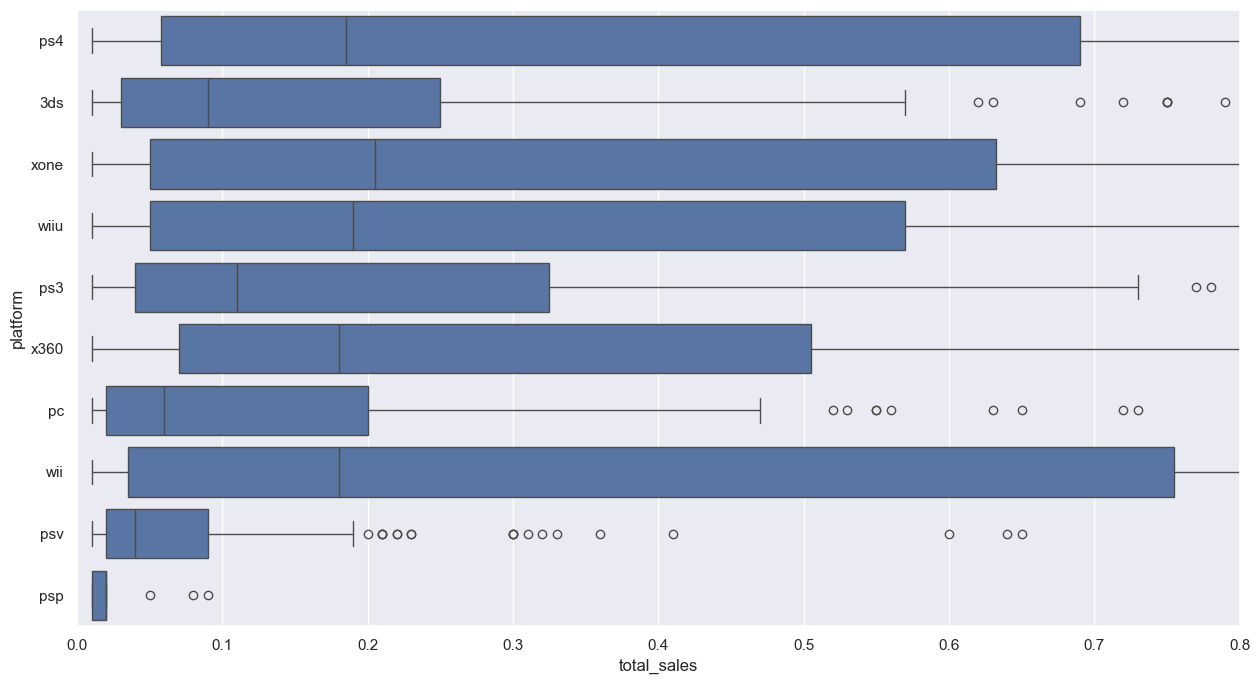

In [50]:
fig, box = plt.subplots()
box = sns.boxplot(x=current_period['total_sales'], y=current_period['platform'])
box.set_xlim(left=0, right=.8)
plt.show()

- Все "Ящики" смещены влево (датафреймы вместе со средним скошены вправо) за счет выбросов отдельных высоких продаж по годам. Основные два пика в районе 12,2 млн копий 14,5 млн копий в год пренадлежат "ps4". 
- Рынок персональных компьютеров показывает стабильное средоточение значений вокруг минимальных. Этот достаточно ровный ряд позволяет делать выводы о следующих периодах продаж платформы, оставляя значения продаж будущих периодов на том же уровне.
- Значения продаж "xone" больше распределены вправо по оси - средний чек за год у них выше, но чуть меньще чем у "ps4".
- Все основные значения продаж по годам распределились до 0,8 млн копий в год. 
- БОльшая часть значений продаж "psv" и все продажи в актульном периоде для "psv" (вместе с "усами") расположились в промежутке до 0,1 млн копий в года. Очередное подтверждение слабого влияния на рынок этих платформ в будущих периодах. 

###  Влияние оценок критиков и пользователей на глобальные продажи

Посмотрим как зависят глобальные продажи пяти различных платформ от оценок пользователей и критиков на отдельных графиках рассеяния и проверим корреляцию:

Зависимость продаж от пользовательского рейтинга для платформы ps4


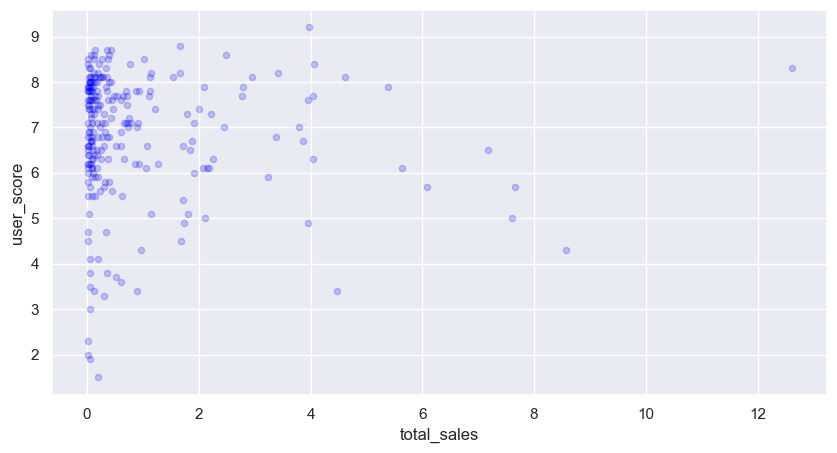

Зависимость продаж от пользовательского рейтинга для платформы 3ds


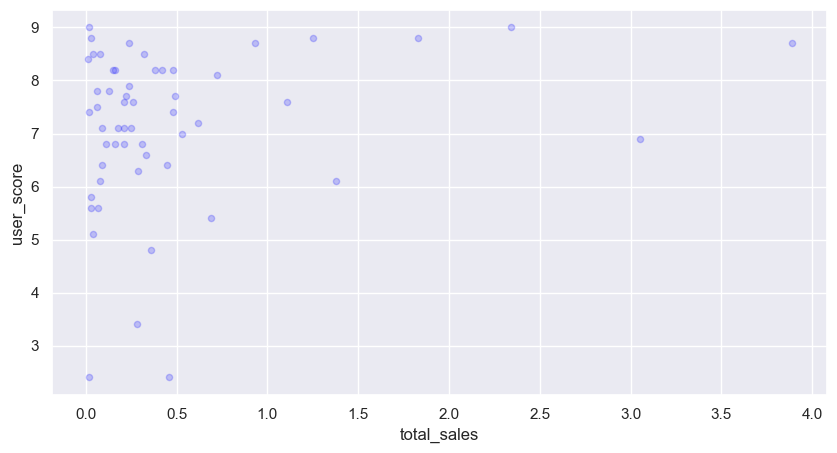

Зависимость продаж от пользовательского рейтинга для платформы xone


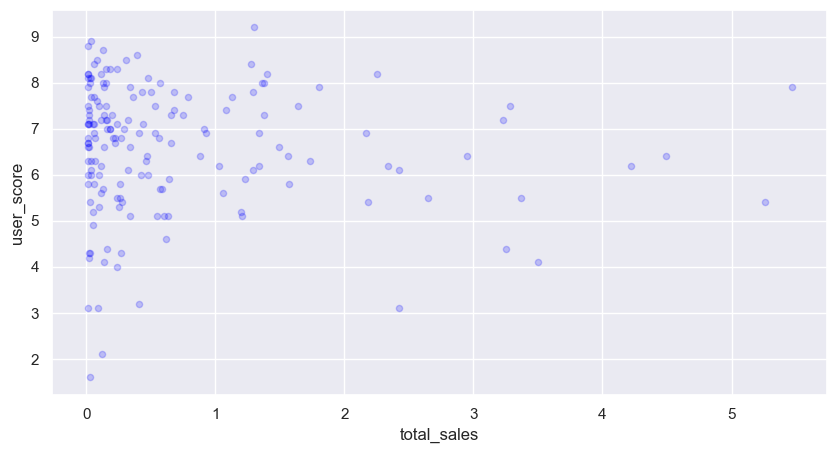

Зависимость продаж от пользовательского рейтинга для платформы ps3


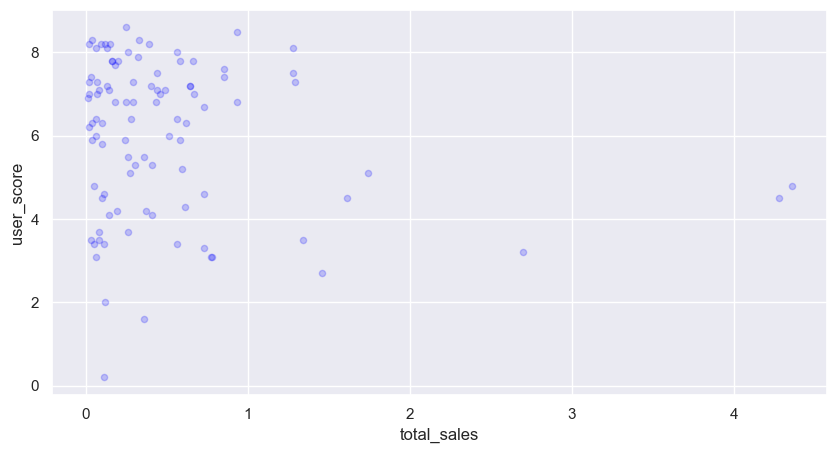

Зависимость продаж от пользовательского рейтинга для платформы x360


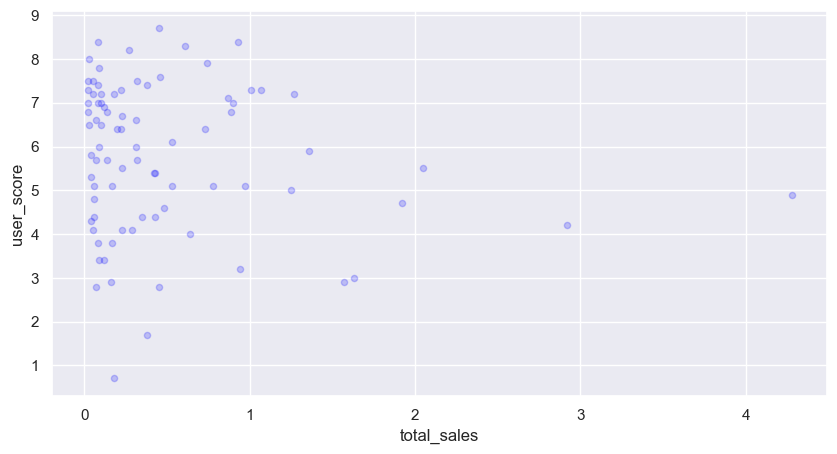

In [51]:
sns.set(rc = {'figure.figsize':(10,5)})
for plat in top_platforms['platform'].unique():
    plat_form_slice = current_period.query('platform == @plat')
    print('Зависимость продаж от пользовательского рейтинга для платформы', plat)
    plat_form_slice.plot(x='total_sales', y='user_score', color='blue', kind='scatter', alpha=0.2)
    plt.show()

Зависимость продаж от рейтинга критиков для платформы ps4


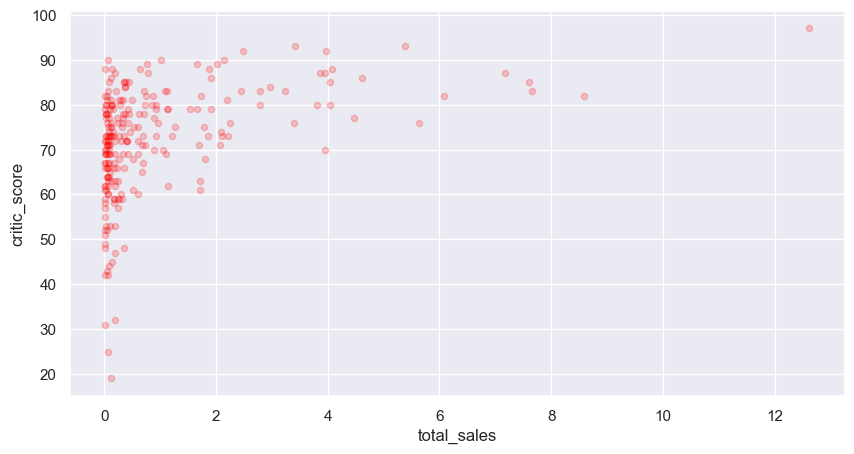

Зависимость продаж от рейтинга критиков для платформы 3ds


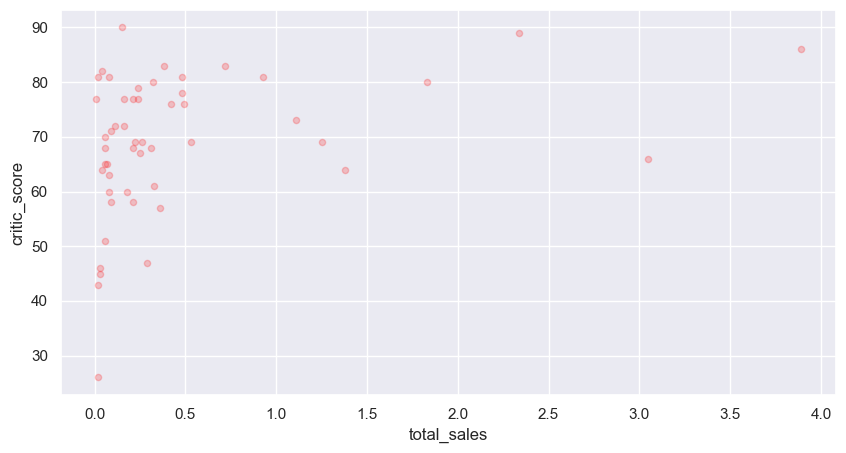

Зависимость продаж от рейтинга критиков для платформы xone


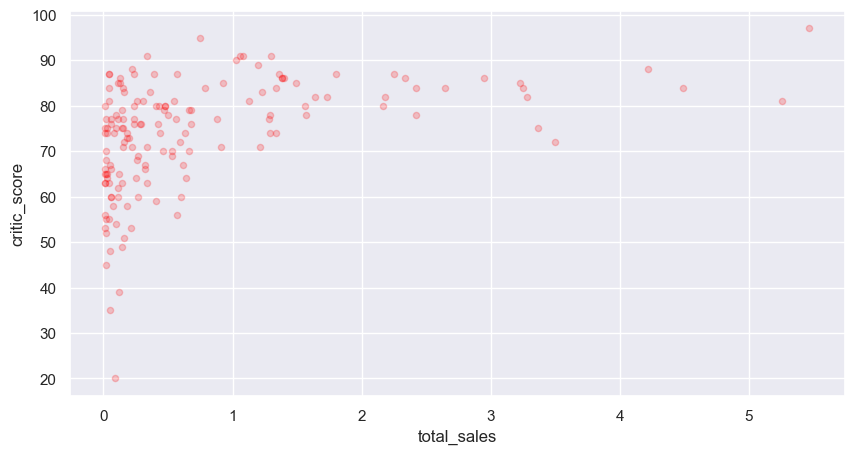

Зависимость продаж от рейтинга критиков для платформы ps3


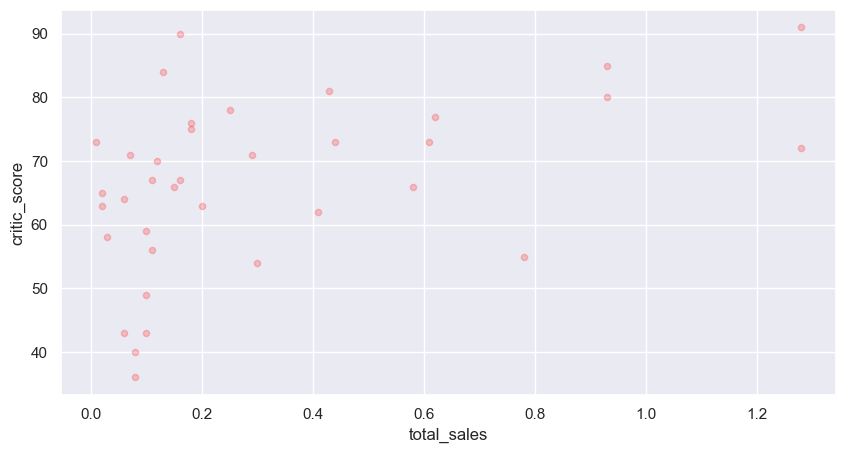

Зависимость продаж от рейтинга критиков для платформы x360


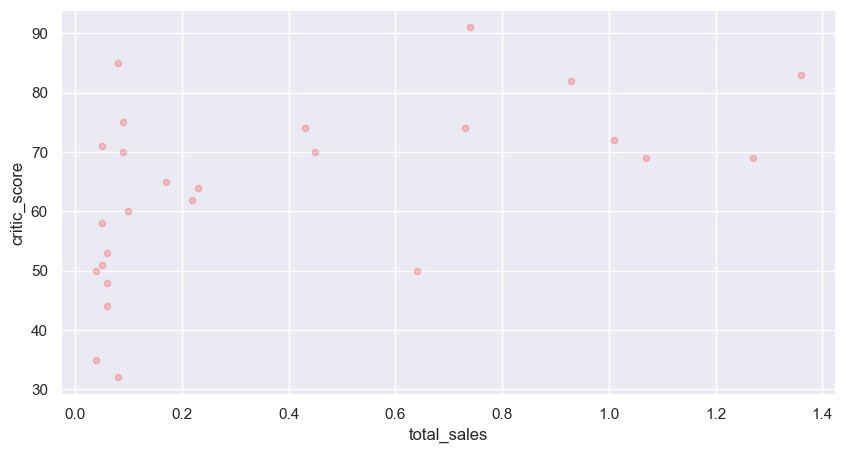

In [52]:
for plat in top_platforms['platform'].unique():
    plat_form_slice = current_period.query('platform == @plat')
    print('Зависимость продаж от рейтинга критиков для платформы', plat)
    plat_form_slice.plot(x='total_sales', y='critic_score', color='red', kind='scatter', alpha=0.2)
    plt.show()

In [53]:
for plat in top_platforms['platform'].unique():
    plat_form_slice = current_period.query('platform == @plat')
    print('Корреляция продаж для платформы', plat, ':')
    print('со значением рейтинга пользователей',plat_form_slice['user_score'].corr(plat_form_slice['total_sales']))
    print('со значением рейтинга критиков', plat_form_slice['critic_score'].corr(plat_form_slice['total_sales']))
    print('')

Корреляция продаж для платформы ps4 :
со значением рейтинга пользователей -0.04013158947269733
со значением рейтинга критиков 0.4026614106810409

Корреляция продаж для платформы 3ds :
со значением рейтинга пользователей 0.2151932718527028
со значением рейтинга критиков 0.314117492869051

Корреляция продаж для платформы xone :
со значением рейтинга пользователей -0.07038392806475809
со значением рейтинга критиков 0.42867694370333187

Корреляция продаж для платформы ps3 :
со значением рейтинга пользователей -0.16676141347662118
со значением рейтинга критиков 0.44657460493190704

Корреляция продаж для платформы x360 :
со значением рейтинга пользователей -0.138444570945665
со значением рейтинга критиков 0.5257228356581523



Для 5ти выбранных платформ тенденция корреляции весьма похожая с точки зрения рейтинга критиков - действительно есть ощутимая связь (коэфециент корреляции от 0,31 до 0,44) для всех платформ. Вывод - на продаж слово критика, очевидно, имеет влияние. С пользовательским рейтингом все иначече - корреляции не наблюдается почти нигже, 3ds корреляция слабая но, все же прослеживается. В целом, можно сказать, что при планировании рекламных компаний платформы "3ds", действительно стоит учитывать не только мнение критиков, но и мнение пользователей. В остальных случаях критики имеют большее влияние. Что касается графиков распределения, то поатформы за исключением ps4 имеют малый набор данных с высоким разбросом с точки зрения оценок пользователей и критиков - это может влиять на получение объективной картины зависимости и, возможно, на бОльших выборках результат приобретет другие очертания. 

Дейстривтельно, если рассматривать глобальные продажи ТОП-платформ, то, только "PC" выбивается из найденной зависимости,  а в остальном высокий рейтинг критиков - высокие продажи. Хотя прослеживается потенциальная зависимость рейтинга пользователей и критиков. Проверим это:

In [54]:
current_period['user_score'].corr(current_period['critic_score'])

0.5044604031800758

In [55]:
data['user_score'].corr(data['critic_score'])

0.5799197898468782

Зависимость есть и весьма сильная - 53%. На историческиъ данных всего датасета она усиливается до 58%. Очевидно, двум этим рейтингам важно что скажет другой. Кто здесь формирует мнение сказать невозможно исходя из текущего набора данных, но они определенно зависят друг от дуга. 

###  Глобальные продажи в разрезе жанров

Посмотрим каrих игр больше в разрезе жанров и какие жанры продаются лучше:

In [56]:
pivot_data = current_period.pivot_table(
        index='genre',          
        values=['total_sales'], 
        aggfunc=['median'],       
    )
pivot_data.columns = ['median_total_sales']
pivot_data.sort_values(by='median_total_sales', ascending=False)

,median_total_sales
genre,
shooter,0.515
sports,0.180
platform,0.140
fighting,0.125
role-playing,0.110
simulation,0.100
action,0.090
misc,0.090
racing,0.090


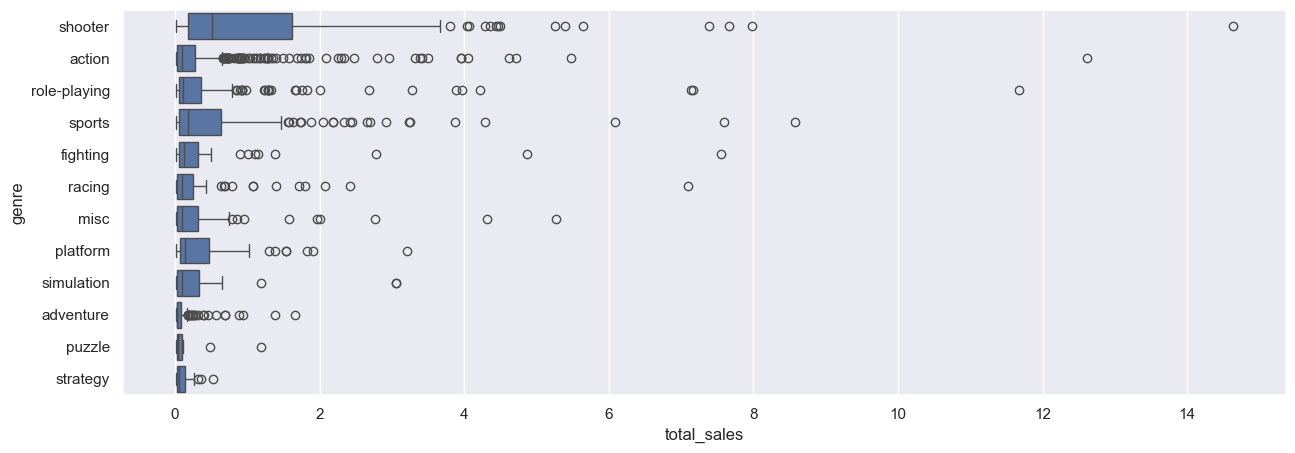

In [57]:
sns.set(rc = {'figure.figsize':(15,5)})

sns.boxplot(x=current_period['total_sales'], y=current_period['genre'])
plt.show()

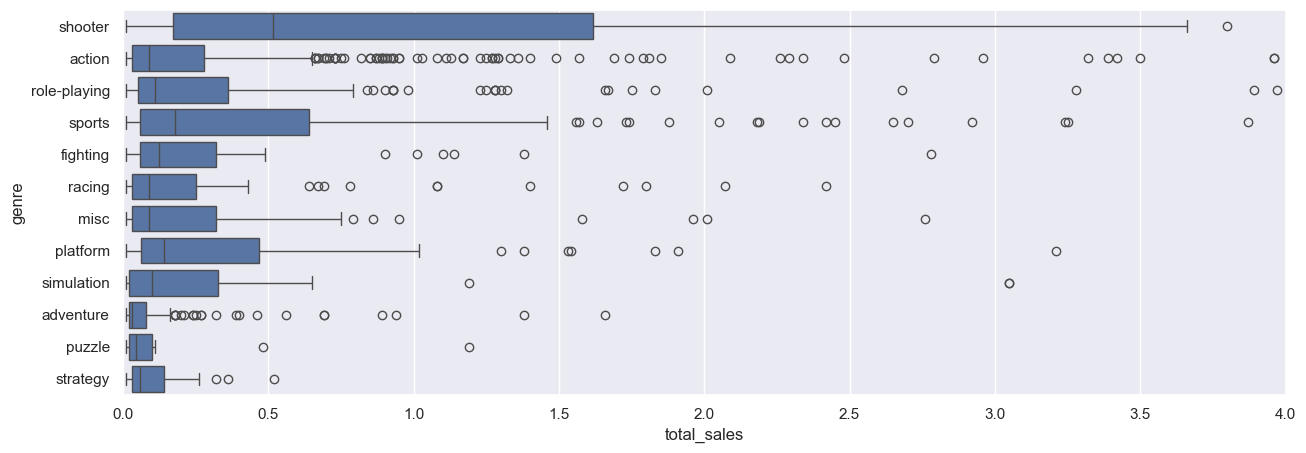

In [58]:
fig, box = plt.subplots()
box = sns.boxplot(x=current_period['total_sales'], y=current_period['genre'])
box.set_xlim(left=0, right=4)
plt.show()

In [59]:
current_period.query('total_sales > 14')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,nr,14.63


Исследуя медианные значения глобальных продаж, можно заметить, что уверенным лидером явдяется жанр "Shooter" - надиана продаж в 5ть раз превышает соседний по уровню медианы прожаж "sports". 
<br/> <br/>  
Оращаясь к диаграме размаха, видим, что бокс жанра "Shooter" больше всех сместился вправо и бОльшая часть значений продаж начинается около 0,2 млн копий в год, при том, что остальные жанры основное сретоточение продаж начинаю не более 0,1 млн копий в год. Третьи квартели всех жанров находятся до 0,5 млн копий в год. Исключение составляют только тот же "Shooter" и "Sports" вместе с ним.  <br/> <br/> 
Сильное влияние на выход в ТОП продаж оказывают выбросы в сторону максимума у ролевых игр и экшн-жанра. Такая же картина и для шутеров, у которох также расянут правый "ус" за счет большого количества продаж вне третьего квартиля, а максимальный выброс больше 14млн копий - это рекордные продажи игры "Сall of duty: black ops 3" в 2015 году Это означает неоднородность продаж игр, но совокупная картина выводит этот жанр в топ. 

## Портрет пользователя каждого региона

Построим портреты пользователей для каждого из региона в трех разрезах: платформ, жанров и рейтинга ESRB. Анализ проводим для ТОП-5 платформ, которые были определены на предидужих этапах. Используем круговую диаграму для отображения данных:

###  Продажи регионов по платформам

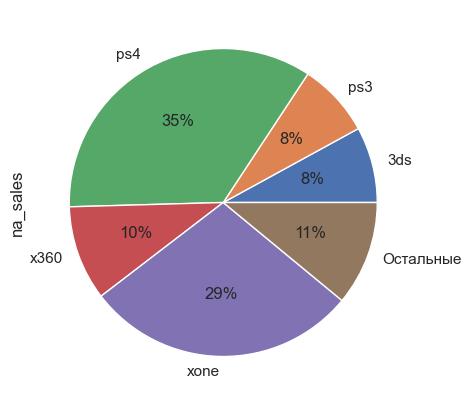

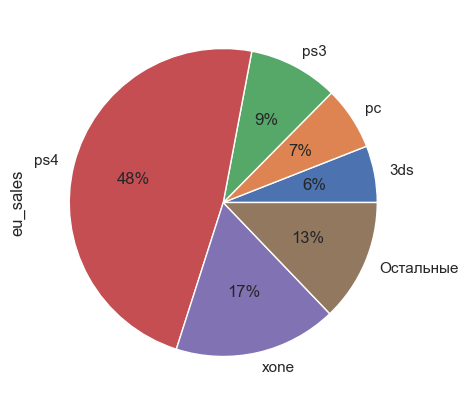

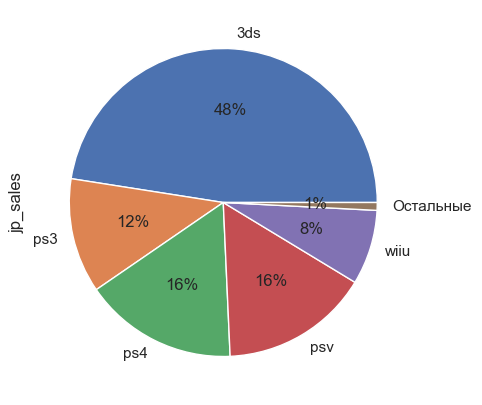

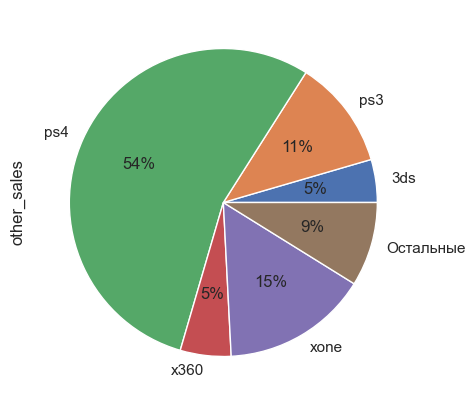

In [60]:
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    platforms_pie = current_period.pivot_table(
        index='platform',
        values=region,
        aggfunc='sum'
    ).sort_values(by=region, ascending=False).reset_index()
    platforms_pie.loc[5:, 'platform'] = 'Остальные'
    platforms_pie['sales_group'] = platforms_pie['platform'].where(platforms_pie['platform'] != 'Остальные', 'Остальные')
    platforms_pie.pivot_table(
        index='sales_group',
        values=region,
        aggfunc='sum').plot(
        kind='pie',
        y=region,
        autopct='%1.f%%',
        subplots=True,
        figsize=(5, 5),
        legend=False
    )

- Северная Америка. 64% рынка разделили почти поровну ps4(35%) и xone(29%). Оставшиеся позиции занимают по-убыванию x360 (10%), ps3 и 3ds по (8%). Осталые платформы знимают 11%
- Европа. Абсолютный лидер - ps4 (48%) второе (17%) и третье(13%) заняли xone и другие платформы. Оставшуюся часть разделили ps3 3ds и pc. Примечательно, что в отличие от рынка Северно Америки, здесь в пятерку лидеров попала платформа PC, а x360 осталась в Остальных игроках. 
- Япония. Здесь 48% рынка за 3ds. Второе место с 16% у обеих поделили ps4 и psv, который в топ вошел только в жтом регионе. 12% у ps3 и 8% у wii, которая в топе представлена тоже только здесь.
- Другие страны. ps4 тоже возглавляет топ с 54%(самый большой показатель из всех регионов). Второе мето у xone но, только с 15%, дальше идут ps3(11%), 3ds и x360 (по 5%) и 9% у остальных

###  Продажи регионов по жанрам

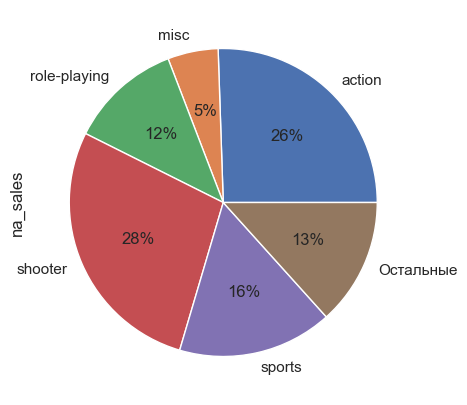

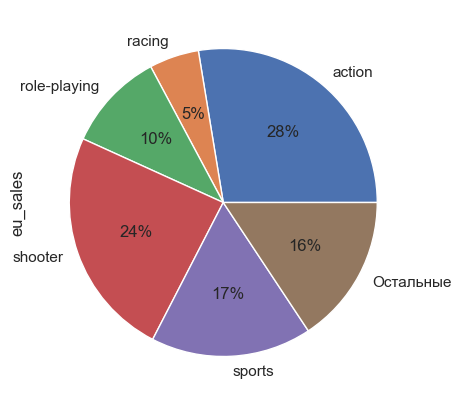

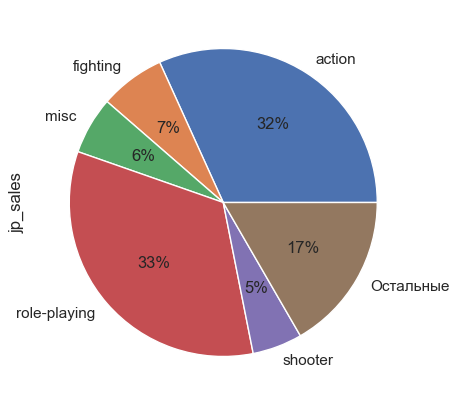

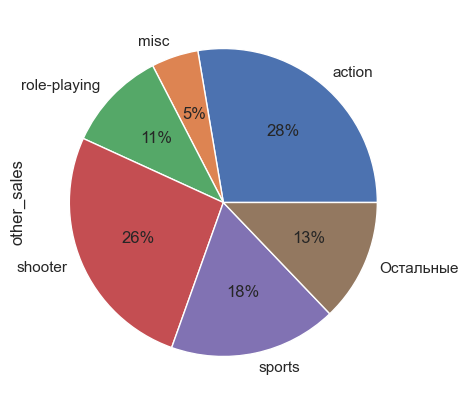

In [61]:
for region in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    genre_pie = current_period.pivot_table(
        index='genre',
        values=region,
        aggfunc='sum'
    ).sort_values(by=region, ascending=False).reset_index()
    genre_pie.loc[5:, 'genre'] = 'Остальные'
    genre_pie['sales_group'] = genre_pie['genre'].where(genre_pie['genre'] != 'Остальные', 'Остальные')
    genre_pie.pivot_table(
        index='sales_group',
        values=region,
        aggfunc='sum').plot(
        kind='pie',
        y=region,
        autopct='%1.f%%',
        subplots=True,
        figsize=(5, 5),
        legend=False
    )

- Северная Америка. В топе экшен и шутер по 26% и 28%, соответственно, далее спортивне игры с 16%, ролевые(12%) и аркады(5%) 
- Европа. Картина очень похожая на Северную Америку, с той тольео разницей, что raicing в топе занимает место более популярных в Америке аркад misc
- Япония. Экшен на прежнем первом месте с 32%. Ролевые игры только в этом регионе поднимаются так высоко на второе мето с 33%. Стреляют(шутеры) здесь гораздо меньше - всего 5%,  остаются еще в топе драки 7%(больше они нигде в топ не попали) и 6% у аркад misc.
- Другие страны. Здесь очевидно, как говорится, влияние запада причем именно Северное Америки. Называется "Найди 10ть отличий". 

###  Продажи регионов по рейтингам ESRB 

Каки рейтинги вообще представлены в выборке и что они означают:

In [62]:
current_period['rating'].unique()

array(['nr', 'm', 'e', 't', 'e10+'], dtype=object)


«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. 

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

«NR» ("No Rating") - наши бывшие пропуски. В жтой группе собраны все игры, которым не присвоили рейтинг. 

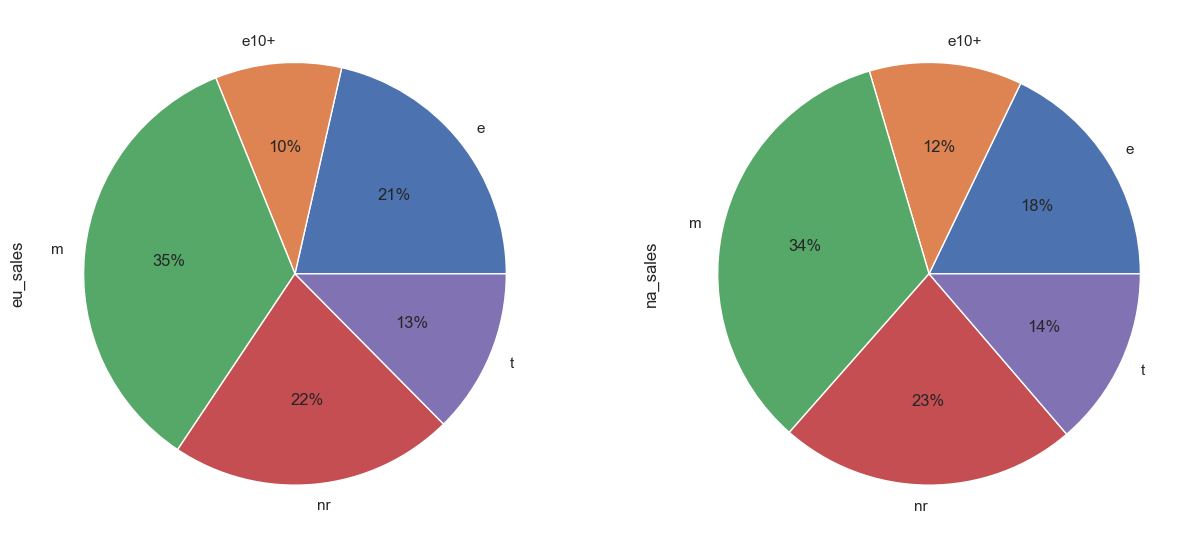

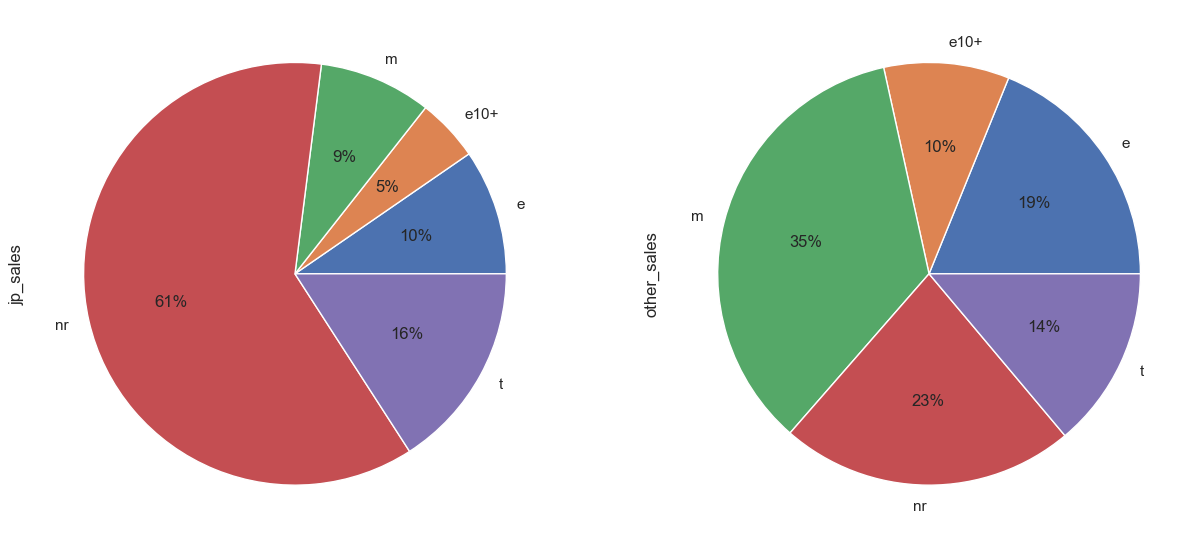

In [63]:
current_period.pivot_table(
    index='rating',
    values=['na_sales', 'eu_sales'],
    aggfunc='sum'
).plot(
    kind='pie',
    autopct='%1.f%%',
    subplots=True,
    figsize=(15, 15),
    legend=False
)
plt.show()

current_period.pivot_table(
    index='rating',
    values=['jp_sales', 'other_sales'],
    aggfunc='sum'
).plot(
    kind='pie',
    autopct='%1.f%%',
    subplots=True,
    figsize=(15, 15),
    legend=False
)
plt.show()

- Европа и Северная Америка сильных отличий не имеют в распределении популярности рейтингов игр. В подавляющем большенстве это Mature (35 и 34%) популярный у взрослых. Игры не получившие рейтинга составляют 22 и 23%
- Япония. Здесь очень низки (по сравнению с остальными представителями регионов) продажи игр для взрослых(всего 9%). Цензура, очевидно, вносит свои коррективы. В основном продаются сегменты Everyone, Everyone 10+ и Teen - самая массовая аудитория, не приученная к явным сценам насилия.  Очень большой процент (61%) игр без рейтинга - в Японии есть своя организация и рейтинг, составленный ей - CERO. Можно говорить об уверенном сопротивлении западным ценностям. 
- Другие страны. Снова повторяют запад с точночсть. до процента

## Проверка гипотез

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различные

In [65]:
results = st.ttest_ind(
    current_period.loc[(current_period.platform == 'xone') & (~current_period.user_score.isna()), 'user_score'], 
    current_period.loc[(current_period.platform == 'pc') & (~current_period.user_score.isna()), 'user_score'],
    equal_var=False)
 
alpha = 0.05
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


In [66]:
current_period.pivot_table(index='platform', values='user_score').query('platform == ["xone", "pc"]')

,user_score
platform,
pc,6.298361
xone,6.594545


Нулевая гипотеза сформирована из правила равенства двух сравниваемых величин. Альтернативная гипотеза - двусторонняя, то есть мы в ней предполагаем что пользовательские рейтинги двух этих платформ просто не равны. Дисперсии двух выборок считаем разной - продукты разные и, как мы видели из различных разрезов анализ позиционирование у них весьма разнится и в зависимости от региона, и от жанра.
- Нулевая гипотеза при проверке на актуальном периоде показала себя состоятельной. Это значит, можно при плланировании следующих периодов, принимать средние значения пользовательских оценок по этим двум продуктам равными. Это подтверждает и прямой расчет среднего по этим двум платформам - значения действительно близки. 


### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные

- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различные

In [67]:
results = st.ttest_ind(
    current_period.loc[(current_period.genre == 'sports') & (~current_period.user_score.isna()), 'user_score'], 
    current_period.loc[(current_period.genre == 'action') & (~current_period.user_score.isna()), 'user_score'],
    equal_var=False)
 
alpha = 0.05
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [68]:
current_period.pivot_table(index='genre', values='user_score').query('genre == ["sports", "action"]')

,user_score
genre,
action,6.760606
sports,5.225197


Нулевая гипотеза здесь выбрана также, исходя из равенства. 
- Целевое же предположение лежит в области альтернативной гипотезы, которая в итоге не может быть отвергнута, так как отвергается нулевая гипотеза. Таким образом на актуальном периоде рассмотрения датасета, пользовательские оценки для жанров Action и Sports, вероятно, разные. Соответсвующие различчия двух средних значений видны и из общего расчета среднего по выборке. 
- Проведем дополнительный эксперимент на полной выборке для верности и включения бОльшего числа данных:

In [69]:
results = st.ttest_ind(
    data.loc[(data.genre == 'sports') & (~data.user_score.isna()), 'user_score'], 
    data.loc[(data.genre == 'action') & (~data.user_score.isna()), 'user_score'],
    equal_var=False)
 
alpha = 0.05
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.07751671595536254
Не получилось отвергнуть нулевую гипотезу


Здесь уровень вероятности pvalue даже в относительно нес строгой значимости в 5% оказался достаточным для не отвержения нулевой гипотезы. Да, этот период не показателен для принятия решений, но, если мы принимаем исторические данные для соверенного мыра, то можно сделать вывод о пересечении двух сегментов пользователей - любителей спортивных иг и жанра Action.


## Общий вывод

В рамках работы были проведены первичные оценки данных, предобработка данных, исследовательский, статистический анализы, а также получены ответы на ключевые вопросы работы, необходимы для достижения основных целей подготовки к прогнозированию будущих периодов продаж игр. 
- На этапе предобработки данных были очищены не явные дубликаты, очищены незначащие данные с пропусками и оценены оставленные данные с пропусками для учета их присутствия при дальнейшем анализе. 
- Этап исспледовательского анали дал оценку основных играков рынка игровой индустрии "xone" "3ds" и "ps4"б которые находятся на сильных позициях как по продажам за последние 3 года, так и по текущему этапу развития жизненного цыкла платформ. Также этот этап позволил определить "ходовые" мировые жанры с наивысшим числом продаж - это Экшн, Шутер, Аркадный жанр, спортивные игры и ролевые игры. Была оценена взаимосвязь продаж от пользовательских оценок и оценок критиков для пяти платформ, а также отображены диаграммы распределения этих величин, что в итоге показал существующую зависимость подаж и рейтинга критиков, а также слабую связь пользовательских оценок и продаж для платформы 3ds.
- Отдельно выли рассмотрены портреты пользователей различных стран. При этом были выделены явные стратегические ставки игровых платформ в различных регионах, которые их производители уже делают или могут сделать на основе этих данных и выводов. В портрете стран, также присутствуют и жанровые предпочтения, и рейтиногвые из классификации ESRB. В этих портретах сильно выделяется Япония, которая движется в своем собственном ритме и ее население является весьма самобытным пользователем игр, в соответствии, вероятно, с иными культурными ценностями развитых стран Азиатского мира, в отличии от типичной картины Запада за которым тянется и остальной мир. 
- В рамках статистического анализа были проверены гипотезы о равенстве пользовательских оценок двух различных продуктов и двух различных жанров. Итоги говорят о неравенстве этих величин при рассмотреннии двух жанров на актуальном периоде, но выводы могут меняться при рассмотрении исторических данных. Если рассматривать равенство двух платформ (pc и xone) с точки зрения равенства средних пользовательских оценок, то можно исходить из небеспочвенности такого равенства. 